In [4]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

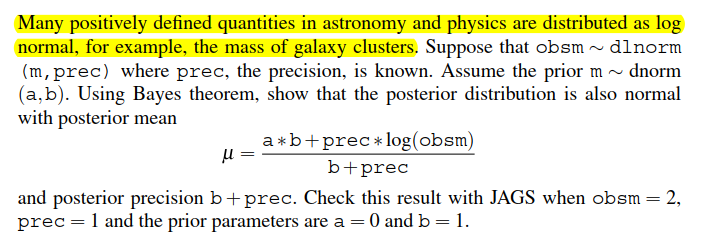

Sequential sampling (2 chains in 1 job)
Metropolis: [m]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


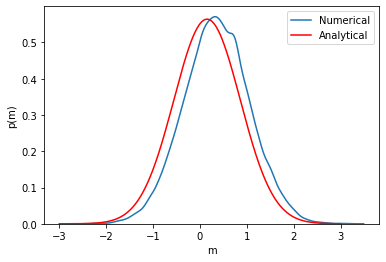

In [11]:
ss = np.linspace(-3,3,1000)
with pm.Model():
    m = pm.Normal('m',mu =0 ,sigma=1) # m = prior
    obs = pm.Lognormal('obs',mu=m,sigma=1,observed = 2) # observed = x
    step = pm.Metropolis()
    trace = pm.sample(20000,step)
sns.kdeplot(trace['m'])
analytical = stats.norm.pdf(ss,loc = math.log(2,10)/2,scale = 0.5**0.5) # loc = mu/ scale = sigma/ log's default lower value is e
sns.lineplot(ss,analytical,color ='r')
plt.xlabel('m')
plt.ylabel('p(m)')
plt.legend(['Numerical','Analytical'])
plt.show()

You can find the analytical proof in 'mathematical proof' folder